In [1]:
import sys
!{sys.executable} -m pip install pandas numpy sklearn matlablib

In [37]:
import numpy as np
import pandas as pd
import csv
import statistics
import matplotlib.pyplot as pt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Data is loaded in from the iris.data file
dataset = pd.read_csv('iris.data' , sep=',')
X = dataset.iloc[:, 0:4]
Y = dataset.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.67, random_state = 3)

In [38]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(X_train,Y_train)
kn.score(X_test, Y_test)

0.96

In [39]:
from sklearn.model_selection import cross_val_score

#Average accuracy
new_kn = KNeighborsClassifier(n_neighbors = 3)
crossVal_scores = cross_val_score(new_kn, X_test, Y_test, cv = 5)
avg = round((statistics.mean(crossVal_scores) * 100) , 2)
print(avg)

97.0


In [40]:
score_list = []

#Loop to test Accuracy of Model 
for k in range(1, 21):
    avg = 0
    for x in range(1 , 6):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.67, random_state = 3)
        kn = KNeighborsClassifier(n_neighbors = k)
        kn.fit(X_train, Y_train)
        Y_pred = kn.predict(X_test)
        avg = avg + (metrics.accuracy_score(Y_test, Y_pred))
    score_list.append(round(((avg / 5) * 100),3))
print(score_list)

[96.0, 94.0, 96.0, 94.0, 96.0, 95.0, 97.0, 96.0, 98.0, 95.0, 94.0, 92.0, 92.0, 94.0, 94.0, 94.0, 93.0, 94.0, 93.0, 95.0]


Text(0, 0.5, 'Average Accuracy for Each K')

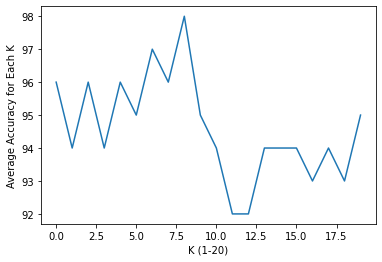

In [41]:
#Line Graph
pt.plot(score_list)
pt.xlabel('K')
pt.ylabel('Average Accuracy for Each K')